In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

In [3]:
#generate some samples data using make_blobs
np.random.seed(42)
data,_=make_blobs(n_samples=100,centers=3,cluster_std=0.60,random_state=0)

#convert the data to a DataFrame
df=pd.DataFrame(data,columns=['x','y'])

In [4]:
#check for any None or NaN values
if df.isnull().values.any():
    raise ValueError("Data contains None or NaN values")

In [10]:
#determine the optimal number of clusters using the elbow method
sse=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

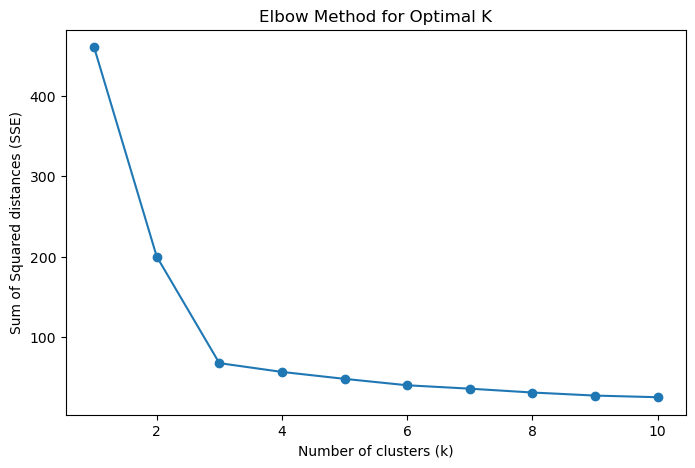

In [11]:
#plot the sse value for each value of k
plt.figure(figsize=(8,5))
plt.plot(k_range,sse,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
optimal_k=3

In [13]:
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

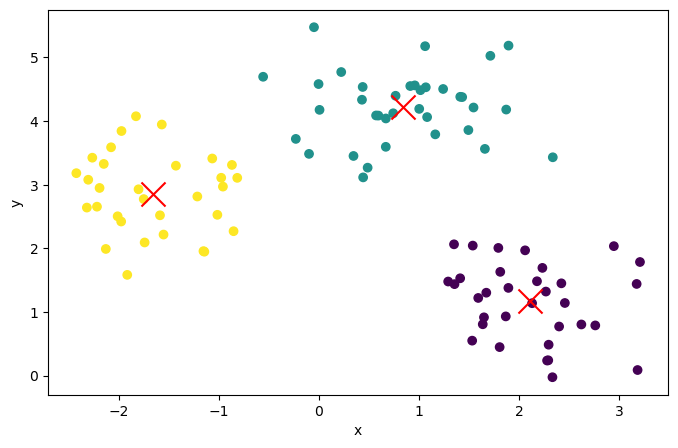

[[ 2.10570255  1.17012424]
 [ 0.84321619  4.22240438]
 [-1.65213203  2.85383679]]


In [15]:
#add the cluster labels to the DataFrame
df['Cluster']=kmeans.labels_
#plot the clustred data
plt.figure(figsize=(8,5))
plt.scatter(df['x'],df['y'],c=df['Cluster'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(kmeans.cluster_centers_)